In [39]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft
import cmath

from processing_func import from_S_to_T, from_T_to_S
from file_opener import run

In [40]:
%matplotlib widget
import matplotlib.pyplot as plt

### Импорт данных

In [41]:
list_of_angles = [0, 30, 45, 60]

In [42]:
for angle in list_of_angles:
    tempTE = pd.read_csv('ND_struct_' + str(angle) + 'deg_s11_TE.txt', sep='\t', header=None, skiprows=3, 
                names=['Frequency', 'ReSz11', 'ImSz11'])
    tempTM = pd.read_csv('ND_struct_' + str(angle) + 'deg_s11_TM.txt', sep='\t', header=None, skiprows=3, 
                names=['Frequency', 'ReSz11', 'ImSz11'])

    if angle == 0:
        tempTE['Angle'] = angle
        tempTM['Angle'] = angle
        dataTE = tempTE.loc[tempTE['Frequency'] == 25]
        dataTM = tempTM.loc[tempTM['Frequency'] == 25]
    else:
        tempTE['Angle'] = angle
        tempTM['Angle'] = angle
        dataTE = pd.concat([dataTE, tempTE.loc[tempTE['Frequency'] == 25]], ignore_index=True)
        dataTM = pd.concat([dataTM, tempTM.loc[tempTE['Frequency'] == 25]], ignore_index=True)

In [43]:
dataTE.head()

,Frequency,ReSz11,ImSz11,Angle
0,25.0,0.904027,0.050718,0
1,25.0,0.808577,-0.338870,30
2,25.0,0.833809,0.182458,45
3,25.0,0.748441,-0.184718,60


In [44]:
dataTM.head()

,Frequency,ReSz11,ImSz11,Angle
0,25.0,0.904027,0.050718,0
1,25.0,0.719588,-0.523267,30
2,25.0,0.720663,-0.509632,45
3,25.0,-0.312453,-0.855562,60


Очистка памяти от ненужных переменных

In [45]:
del angle

### Импорт данных из CST

In [46]:
cst_pattern = pd.read_csv('D_struct_0deg_farfield_TE.txt', sep=' ', header=None, skiprows=2,
                            skipinitialspace=True, index_col=False,
                            names=['theta', 'absP'], usecols=[0, 2])

In [47]:
cst_pattern.head()

,theta,absP
0,0.0,3.366
1,1.0,14.040
2,2.0,30.690
3,3.0,41.750
4,4.0,37.220


In [48]:
max_power = cst_pattern.absP.max()
cst_pattern['normP_dB'] = 10 * np.log10(cst_pattern['absP'] / max_power)
cst_pattern.head()

c:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,theta,absP,normP_dB
0,0.0,3.366,-27.343867
1,1.0,14.040,-21.141337
2,2.0,30.690,-17.745039
3,3.0,41.750,-16.408443
4,4.0,37.220,-16.907244


In [49]:
# np.sum(np.isnan(cst_pattern['normP_dB']))

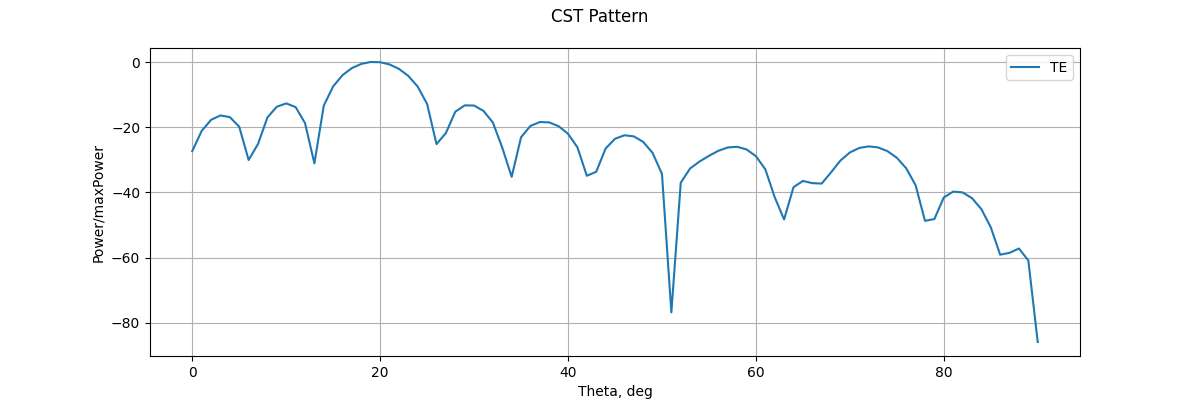

In [52]:
fig1 = plt.figure(figsize=(12,4))

ax_1 = fig1.add_subplot(111)
ax_1.plot(cst_pattern['theta'], cst_pattern['normP_dB'], label='TE')
ax_1.set_xlabel("Theta, deg")
ax_1.set_ylabel("Power/maxPower")
ax_1.legend()
ax_1.grid()


fig1.suptitle('CST Pattern')
plt.show()